# Projecc

Projecc is a small simple pacakge for converting from orbital elements to on-sky projection and vice versa.  It is only for two-body systems and treats the system as a test mass orbiting a central object with total mass = M1 + M2.

## Converting orbital elements into Cartesian coordinates

The figure below reproduces Figure 3 of <a href="http://adsabs.harvard.edu/abs/2010exop.book...15M">Murray and Correia (2010)</a> and represents the coordinate system we employed. In the orbit plane, we establish <b>($\hat x,\hat y, \hat z$)</b> denoting the orbit plane centered at the barycenter where <b>$+\hat x$</b> defines the line from the barycenter to periastron (closest point of approach), <b>$+\hat y$</b> is perpendicular to $+ \hat x$ in the orbit plane, and <b>$+\hat z$</b> is orbit normal in the direction of the angular momentum vector. 



<img src="images/MC-Fig3.png" alt="Coordinate system" width="500"/>


The orbit is described by seven parameters: semi-major axis, period, eccentricity, inclination, longitude of ascending node, argument of periastron, and time since reference point. The semi-major axis ($a$) describes the size of the orbit and is defined as half the line from periastron to apastron (farthest point in the orbit plane), and is related to period ($P$) and total mass through Kepler's 3rd law: $\left(\frac{P}{1 yr}\right)^2  = \left(\frac{a}{1 au}\right)^3 \left(\frac{1 \rm{M}_{\odot}}{\rm{M_{tot}}}\right)$, where for a two-body system composed of one star and one planet $\rm{M_{tot}} = M_* + M_p$. The position of a body at a moment in time is given by 
\begin{equation}
 \begin{pmatrix}
x\\
y\\
x\\
\end{pmatrix} =    
 \begin{pmatrix}
r \cos{f}\\
r \sin{f}\\
0\\
\end{pmatrix}
\end{equation}
where $r = \left(\frac{\rm{M}}{\rm{M_{tot}}}\right) \left(\frac{a (1-e^2)}{1+e\cos{f}}\right)$ where M represents either M$_*$ or M$_p$ depending on body of interest, $e$ is the eccentricity, and $f$ is the true anomaly, the angular location of the body relative to periastron. The true anomaly is computed as
\begin{equation}
    f = 2 \tan^{-1} \left(\sqrt{\frac{1+e}{1-e}} \tan(E/2) \right)
\end{equation}
where $E$ is the eccentricity anomaly, computed from $M = E - e \sin E$, where $M$ is the mean anomaly, the angular location of the body in a circular orbit as a function of time. 




<img src="images/MC-Fig4.png" alt="Coordinate system" width="500"/>

Projecting the orbit onto the sky plane, we establish the coordinate system shown above (Murray and Correia 2010 Fig 4), ($\hat X,\hat Y,\hat Z$) where $+\hat X$ is the reference direction and corresponds to the +declination direction, $+\hat Y$ corresponds to the +right ascension direction, and $+\hat Z$ forms a right-handed system with $+\hat Z$ towards the observer. Note that this is the opposite of the common RV convention of $+\hat Z$ being away from the observer. Transformation from the orbit plane to the sky plane uses the rotation matrices
\begin{equation}
    \bf{P}_x(\phi) =  \begin{pmatrix}
1 & 0 & 0\\
0 & \cos{\phi} & -\sin{\phi}\\
0 & \sin{\phi} & \cos{\phi}\\
\end{pmatrix}
\end{equation}

\begin{equation}
    \bf{P}_z(\phi) =  \begin{pmatrix}
\cos{\phi} & -\sin{\phi} & 0\\
\sin{\phi} & \cos{\phi} & -\sin{\phi}\\
0 & 0 & 1\\
\end{pmatrix}
\end{equation}


Then:
\begin{equation}
 \begin{pmatrix}
X\\
Y\\
Z\\
\end{pmatrix} =    {P}_z(\Omega){P}_x(i){P}_z(\omega)
 \begin{pmatrix}
x\\
y\\
z\\
\end{pmatrix}
\end{equation}
where $i$ is the orbit plane inclination relative to the sky plane with $i=90^\circ$ being edge on orbits, $i \in[0^\circ,90^\circ)$ corresponding to prograde (counter clockwise), and $i \in (90^\circ,180^\circ]$ corresponding to retrograde (clockwise); $\Omega$ is the longitude of ascending node, the angular location of the point where the orbit crosses the sky plane from the $-\hat Z$ to the $+\hat Z$ with $\Omega$ increasing counter clockwise from $+\hat X$ (corresponding to east of celestial north); $\omega$ is the angular location in the orbit plane from the ascending node to periastron. The final parameter is the timing parameter, or the position of a body at a reference time from which the other orbit parameters can be used to predict the location at a desired time. Since the position of the body is set by the mean anomaly, which is the angular location of a circular orbit since periastron, we use the epoch of periastron passage $T_0$ as the reference time, such that the body is at periastron at $T_0$ and $M=0$. Then $M = 2\pi \frac{\Delta t}{P}$, where $\Delta t = t - T_0$ is the time since periastron passage, and $P$ is the orbital period. 

This table shows the orbital elements, units, and priors used (except where noted)


| Parameter                      | Symbol                       | Unit         | Prior                                |
|--------------------------------|------------------------------|--------------|--------------------------------------|
| Semi-major axis                | $a$                          | au           | $\mathcal{N}(\mu,\sigma)$ or fixed or $\mathcal{U}[10^{l}, 10^{u}]$         |
| Eccentricity                   | $e$                          | --           | $\mathcal{N}(\mu,\sigma)$ or lin desc           |
| Period                         | $P$                          | days         | $\mathcal{N}(\mu,\sigma)$            |
| Inclination                    | $i$                          | deg          | $\cos(i)\; \mathcal{U}[-1,1]$        |
| Argument of Periastron         | $\omega_p = w_* + 180^\circ$ | deg          | $\mathcal{N}(\mu,\sigma)$ or  $\mathcal{U}[0,360]$           |
| Longitude of Nodes             | $\Omega$                     | deg          | $\mathcal{N}(\mu,\sigma)$ or 0.0  or or  $\mathcal{U}[0,360]$    |
| Epoch of Periastron Passage    | $T_0$                        | BJD          | $\mathcal{N}(\mu,\sigma)$            |
| Star Mass                      | M $_{*}$                     | M $_{\odot}$  | $\mathcal{N}(\mu,\sigma)$           |
| Planet Mass or M $\sin(i)$     | M $_b \sin(i)$               | M $_{\odot}$ or M $_{\oplus}$ | $\mathcal{N}(\mu,\sigma)$           |
| Parallax                       | $\pi$                        | mas          | $\mathcal{N}(\mu,\sigma)$            |


## Ex 1: Drawing random orbits

The DrawOrbits function was built to be able to work with OFTI, which involves drawing a random orbits then scaling sma and lon to match observations, so if you want those drawn from priors as well there are arguments to set to True (they default to True).  DrawSMA = True causes semi-major axis to drawn from a log(Uniform) prior from $\mathcal{U}[10^{l}, 10^{u}]$, where $l$ and $u$ are lower and upper bounds respectively. DrawLON = True causes longitude of nodes to be drawn from a uniform prior $\mathcal{U}[0^{\circ}, 360^{\circ}]$.

The "Nielsen Prior" is a linearly descending prior on eccentricity to suppress high eccentricities 

In [14]:
from projecc import *
import astropy.units as u

# Set up system masses:
Mstar1 = 1.5*u.Msun
Mstar2 = 0.3*u.Msun
# Compute Kepler's constant 
kep = KeplersConstant(Mstar1,Mstar2)

# Draw 500 random orbits from orbital parameter priors:
# semi-major axis: LogUnif[LowerBound,UpperBound]
# eccentricity: Unif[0,1] or Linearly Descending
# inclination: cos(inc) Unif[-1,1]
# argument of periastron: Unif[0,2pi]
# longitude of nodes: Unif[0,2pi]
# mean anomaly: Unif[0,2pi]
np.random.seed(42)
Nsamples = 500
sma, ecc, inc, argp, lon, meananom = DrawOrbits(Nsamples, 
                                                DrawLON = True,
                                                DrawSMA = True, 
                                                SMALowerBound = 0, SMAUpperBound = 3,
                                                EccNielsenPrior = True)

In [15]:
# Compute 3d position, velocity, and acceleration for each random orbit:
# (Set the mean anomaly to zero to get the location of periastron)
pos, vel, acc = KeplerianToCartesian(sma,ecc,inc,argp,lon,np.array([0]*len(sma)),kep)
# pos (3xN arr) [au]: position in xyz coords in au, with 
#                        x = pos[0], y = pos[1], z = pos[2] for each of N orbits
#                        +x = -RA, +y = +Dec, +z = towards observer (NOTE: this is reverse from 
#                                                          the RV convention of +z = away from observer)
# vel (3xN arr) [km/s]: velocity in xyz plane.
# acc (3xN arr) [km/s/yr]: acceleration in xyz plane.

pos

<Quantity [[-1.63584182e-02, -7.53348123e+00, -7.02995510e-01],
           [-1.47029245e+01, -4.89837722e+02,  6.42390755e+01],
           [ 1.16920152e+02, -5.91539887e+01,  1.40813037e+01],
           ...,
           [ 9.24831862e-01, -1.11501989e+00,  6.67964001e-01],
           [ 1.99673169e+02, -4.27380090e+01,  7.39632911e+01],
           [-1.52888753e+02, -4.84533926e+02,  4.62289524e+02]] AU>

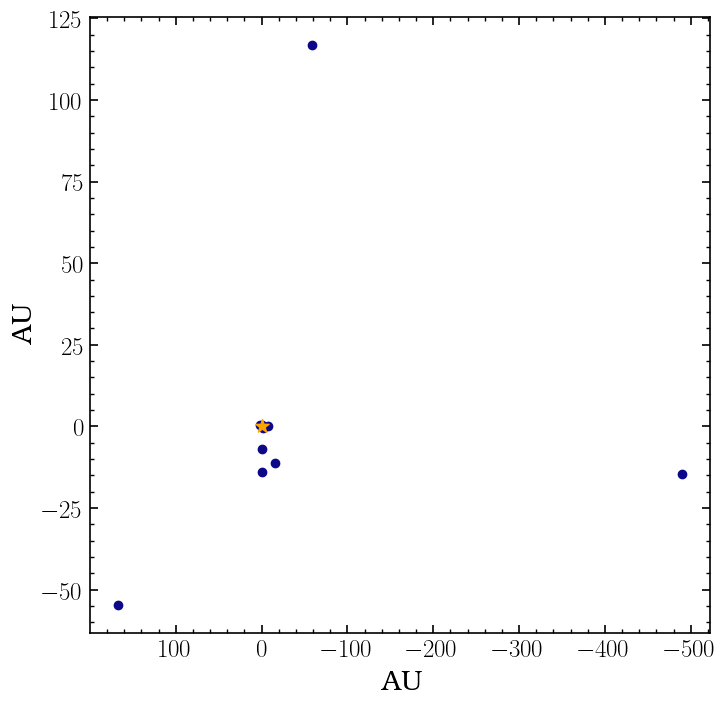

In [16]:
# here is a plot of inital position of the first 10 random orbits in on-sky RA/Dec:
plt.figure(figsize = (8,8))
plt.scatter(0,0, marker = '*', color='orange', s=100, zorder=10)
plt.scatter(pos[:10,1],pos[:10,0])
plt.gca().invert_xaxis()
plt.xlabel('AU')
plt.ylabel('AU')
plt.show()

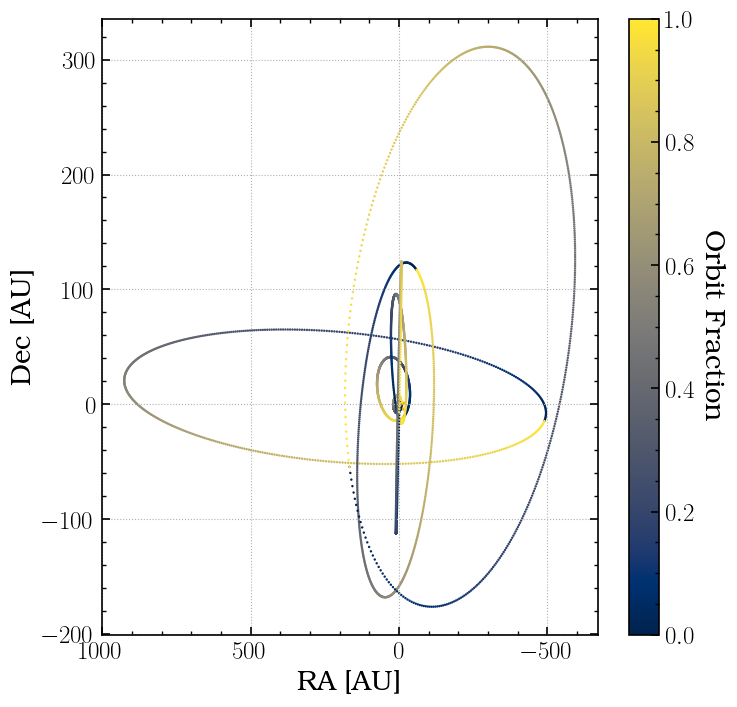

In [17]:
# Plot of the first 10 full orbit tracks in the plane of the sky:
cmap = 'cividis'
# Set number of points along a track to plot:
Npoints = 500
# Set up figure:
plt.figure(figsize = (8,8))
# Plot location of central object
plt.scatter(0,0, marker = '*', color='orange', s=100)
# For each orbit:
for i in range(10):
    # Get N points along the tracks
    Xs, Ys = GetOrbitTracks(sma[i], ecc[i], inc[i], argp[i], lon[i], kep, Npoints = Npoints)
    taus = np.linspace(0,1,Npoints)
    # Plot:
    plt.scatter(Ys, Xs, c=taus, cmap=cmap, s=3, lw=0)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Orbit Fraction', rotation=-90, va="bottom")
# Reverse x-axis for RA increasing to the left:
plt.gca().invert_xaxis()
plt.xlabel('RA [AU]')
plt.ylabel('Dec [AU]')
plt.grid(ls=':')
plt.show()



#### To go from pos and vel back to orbital elements:

Returns: sma, ecc, inc, argp, lon.value, M

NOTE: You must have 3D information for both position and velocity.

In [5]:
# For the first random orbit:
CartesianToKeplerian(pos[0], vel[0], kep)

(<Quantity 987.22692043 AU>,
 <Quantity 0.52571339>,
 <Quantity 30.11634052 deg>,
 <Quantity 102.26110369 deg>,
 <Quantity 20.0728633 deg>,
 <Quantity 2.80791874>)

#### Note: as of now it can only handle one orbit at a time. If you need to compute for several orbits use a for loop

#### Using astropy units let you put quantites in any unit and does the conversions for you:

In [14]:
sep_meters = 1.9e11*u.m
sep_au = sep_meters.to(u.AU).value
print(period(sep_meters,Mstar1+Mstar2))
print(period(sep_au,Mstar1+Mstar2))

1.0668565570887611
1.0668565570887611


#### Mean Anomaly is the fraction of a circular orbit completed (in radians) at a given time point.  $T_0$ is the time of periastron passage, defined as Mean Anom = 0, in years.  To convert from a given Mean Anom to  $T_0$:

In [18]:
Period = period(sma*u.AU,Mstar1+Mstar2)
# RefEpoch is the reference epoch, aka the date at which the mean anomaly was measured (Defaults to the Gaia DR3 ref epoch)
# AfterDate: returns the first periastron passage to occur after this date. Usefull for planning observations or tiems in the future. 
#       If set to None (default), returns the periaston passage date closest to the reference date.
t0 = MeanAnomToT0(meananom, Period, RefEpoch = 2016, AfterDate = 2016)
t0[0]

2022.2306842011533

#### To randomly draw separation and position angle (r,$\phi$):

In [19]:
r, phi = DrawSepAndPA(Nsamples, Mstar1, Mstar2, DrawSMA = False, FixedSMA = 10.*u.AU)
r.shape,phi.shape

((500,), (500,))

# Ex 2:
### Prediciting the location of Sirius B relative to Sirius A over time

In [1]:
from projecc import *

In [2]:
# Orbital elements and uncertainties from Bond et al 2017: https://iopscience.iop.org/article/10.3847/1538-4357/aa6af8/pdf
Per = [50.1284,0.0043]
sma = [7.4957,0.0025] # arcsec
inc = [136.336,0.040]
lan = [45.4,0.071]
T0 = [1994.5715,0.0058]
ecc = [0.59142,0.00037]
argp = [149.161,0.075]
# masses
MA = [2.063,0.023]
MB = [1.018,0.011]


#  Obsdate must be in decimal year, we can use astropy time object to convert. 
# Let's observe on August 15th 2025.
from astropy.time import Time
obsdate = Time('2025-08-15T00:00:00')
obsdate =  obsdate.decimalyear
# Convert time of periastron passage and observation date to mean anomaly: 
meananom = T0ToMeanAnom(MonteCarloIt(T0),
                        MonteCarloIt(Per), 
                        RefEpoch = obsdate)
meananom

array([3.8910117 , 3.89169224, 3.89171941, ..., 3.89132032, 3.89136757,
       3.89085963])

In [3]:
### We'll use the Monte Carlo method to propigate errors throughout the calculation:
# Set up array of system masses:
Mstar1 = MonteCarloIt(MA)*u.Msun
Mstar2 = MonteCarloIt(MB)*u.Msun
# Compute Kepler's constant 
kep = KeplersConstant(Mstar1,Mstar2)
kep

<Quantity [4.08126492e+20, 4.03919317e+20, 4.16126587e+20, ...,
           4.08133255e+20, 4.08550220e+20, 4.10499910e+20] m3 / s2>

In [5]:
# The sma is given in arcsecs, so if we put arcsecs in our output will also be in arcsecs

#Compute 3d position, velocity, and acceleration for each random orbit:
pos, vel, acc = KeplerianToCartesian(MonteCarloIt(sma),
                                     MonteCarloIt(ecc),
                                     MonteCarloIt(inc),
                                     MonteCarloIt(argp),
                                     MonteCarloIt(lan),
                                     meananom,kep)

In [6]:
# Compute separation and position angle at observation date: 
r,phi = GetSepAndPA(pos)
sep = [np.mean(r),np.std(r)]
pa = [np.mean(phi),np.std(phi)]
sep,pa

([11.203035580458884, 0.004836424925082163],
 [57.69280257006581, 0.09208373177310321])

In [7]:
# For the orbit through time at multiple observation dates:
obsdates = [1997, 2001, 2010, 2014, 2016, 2020, 2025.5, 2027.5]
# create empty containers to store results:
seps, pas = [], []
decs_sig, ras_sig = [], []
decs, ras = [], []
for date in obsdates:
    meananom = T0ToMeanAnom(MonteCarloIt(T0),
                        MonteCarloIt(Per), 
                        RefEpoch = date)

    pos, vel, acc = KeplerianToCartesian(MonteCarloIt(sma),
                                     MonteCarloIt(ecc),
                                     MonteCarloIt(inc),
                                     MonteCarloIt(argp),
                                     MonteCarloIt(lan),
                                     meananom,kep)
    r,phi = GetSepAndPA(pos)
    sep = [np.mean(r),np.std(r)]
    pa = [np.mean(phi),np.std(phi)]
    seps.append(sep[0])
    pas.append(pa[0])
    dec = pos[:,0]
    ra = pos[:,1]
    decs.append(np.mean(dec))
    decs_sig.append(np.std(dec))
    ras.append(np.mean(ra))
    ras_sig.append(np.std(ra))

# convert lists to arrays for easier future calcs:
ras = np.array([ra.value for ra in ras])
decs = np.array([dec.value for dec in decs])
ras_sig = np.array([ra.value for ra in ras_sig])
decs_sig = np.array([dec.value for dec in decs_sig])

In [8]:
# Lets's compute an orbit track by supplying a finer arrays of dates:
orbobsdates = np.linspace(T0[0],T0[0]+Per[0],100)
orbdecs, orbras = [], []
for date in orbobsdates:
    meananom = T0ToMeanAnom(T0[0],
                        Per[0], 
                        RefEpoch = date)

    pos, vel, acc = KeplerianToCartesian(sma[0],
                                     ecc[0],
                                     inc[0],
                                     argp[0],
                                     lan[0],
                                     meananom,np.mean(kep))
    orbdecs.append(pos[0].value)
    orbras.append(pos[1].value)

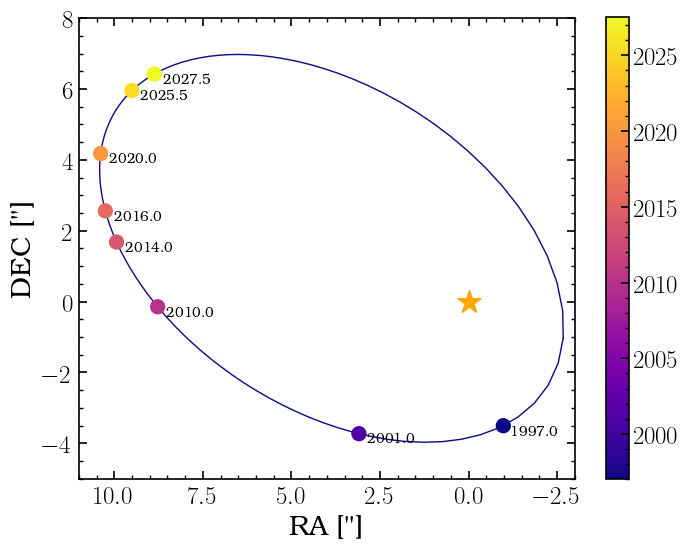

In [10]:
# Compare to Bond+ 2017 Figure 4:

plt.plot(orbras,orbdecs, lw=1)
plt.scatter(0,0, marker='*', color='orange', s=300)
plt.scatter(ras,decs, c=obsdates, s=100, zorder=10)
plt.colorbar()
for i in range(len(obsdates)):
    plt.annotate('{:.1f}'.format(obsdates[i]), xy = (ras[i],decs[i]), xytext = (6,-6), textcoords='offset points')
# Error bars are much smaller than markers so we don't really need to plot those.


plt.ylim(-5,8)
plt.xlim(-3,11)
plt.gca().invert_xaxis()
plt.gca().set_aspect('equal')
plt.xlabel('RA ["]')
plt.ylabel('DEC ["]')
plt.savefig('SiriusB-Bond2017.png',bbox_inches='tight')

## Ex 3: Planet objects: 
#### for using literature orbital parameter constraints to predict planet location as a function of time

Projecc also contains a set of objects and functions for taking published orbital parameter values and generating a prediction of where the planet will be in the sky plane at a given time.

Let's use values from Faria et al. 2022 for Proxima Centauri b:

In [1]:
from projecc import *
import astropy.units as u

# Prox b's params
# from Su\'arez Mascare\~no 2020: https://ui.adsabs.harvard.edu/abs/2020A%26A...639A..77S/abstract

# sma must be in au:
sma = [0.04856,0.00029]
# Period must be in days (since this is built for RV orbits)
Period = [11.18418,0.0007] 
ecc = [0.109,0.07]
# mass in Earth masses:
Mpsini = [1.16,0.13] #u.Mearth  
# RV orbits typically report argp for the star, so we need to apply a 180 deg shift to get
# the planet argp (reference: https://ui.adsabs.harvard.edu/abs/2022arXiv221206966H/abstract)
argp = [np.degrees(-1.9) % 360,np.degrees(0.73)]
argp = [(argp[0] + 180)%360, argp[1]]
# Longitude of nodes is undetermined with an RV-only solutions, so let's set it zero, forcing the ascending node
# to be on the +Dec line
lan = 0
# Epoch of periastron passage must be in Julian date with uncertainty in days:
t0 = [2458530.2, 1.3]
# Inclincation is unconstrained. Inc = nan will cause cos(inc) to be drawn from a uniform dis on [10,88] deg
inc = np.nan
# stellar mass:
Mstar = [0.1221,0.0022] 
# parallax in mas:
plx = [768.500000,0.203021]

# Construct the planet object
proxb = Planet(sma,ecc,inc,argp,lan,Period,t0,Mpsini,Mstar,plx)

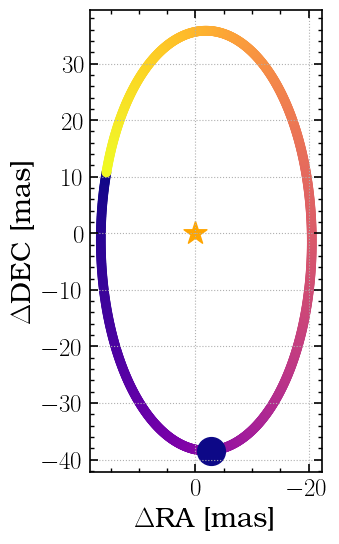

In [2]:
# We can look at the orbit decribed by the mean orbital parameters:
Orbfrac = np.linspace(0,1,1000)
plt.scatter(0,0, marker='*', color='orange', s=300)
plt.scatter(proxb.ras_mean_params,proxb.decs_mean_params, c=Orbfrac)
# Where is Prox Cen b expected to be at its max separation from the star:
plt.scatter(proxb.ras_mean_params[proxb.ind_of_max_elongation[0]],
            proxb.decs_mean_params[proxb.ind_of_max_elongation[0]],
            c=Orbfrac[proxb.ind_of_max_elongation[0]], s= 400)
plt.gca().invert_xaxis()
plt.gca().set_aspect('equal')
plt.xlabel('$\Delta$RA [mas]')
plt.ylabel('$\Delta$DEC [mas]')
plt.grid(ls=':')

In [3]:
# Create a simulation of points in the orbit of Prox Cen b described by the above distributions at a specific date
# In this case, I want to see points at the time Prox Cen b is expected to be at it's max elongation from the star.
points = OrbitSim(proxb, proxb.date_of_max_elongation)



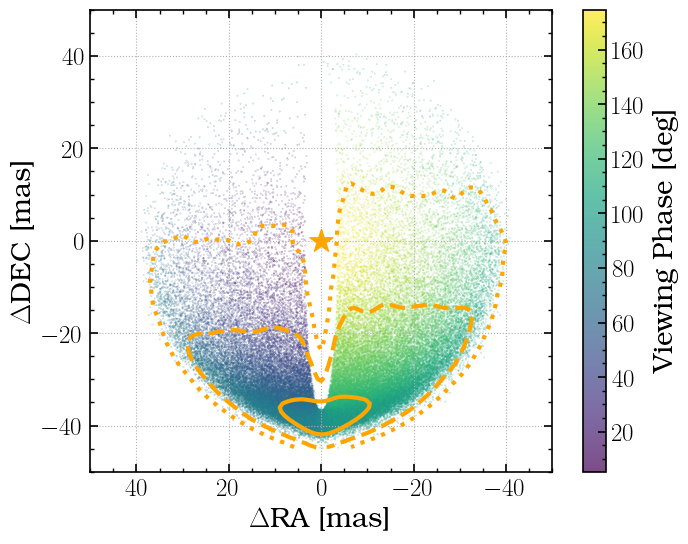

In [4]:
# And we can make a plot of those points:
fig = MakeCloudPlot(points, lim = 50)

Oh yikes! All of those points should be at the same location as the big blue point in the first plot.  There is a possibility that if we go to look for Prox Cen b at its max elongation it'll actualy be way closer to the star!

# Ex 4. Using projecc to make completeness maps

From a direct imaging companion search, you will typically generate a contrast curve for your image reduction - how faint of an object would you have detected at a particular significance as a function of separation from the host star. Once you know how sensitive your data reduction was, it's often useful to turn that into a statement of how sensitive you are to all the possible companions that could be there; or, given a simulated set of companions from bins of (mass, semi-major axis), how many would we have detected in our imaging?  This is called a completeness map, how complete was your imaging or your whole survey to all the possible companions out there.

This notebook doesn't go through determining contrast curves, you will have to have done that prior to this step. But once you have a contrast curve, this will show how to use projecc to make a completeness map.

In [4]:
from projecc import *
import astropy.units as u

### Load contrast curve:
Here is an example 5 $\sigma$ contrast curve from Pearce et al. 2022. The contrast limits were turned into mass estimates using evolutionary models, and the angular separation was turned into physical separation (in the plane of the sky not the orbit plane) using the star's distance.

For this example you will need an example contrast curve, called 'contrast-curve-ex.pkl', which can be downloaded from the github repo or from here: https://doi.org/10.5281/zenodo.15830011

Text(0.5, 0, 'Sep [au]')

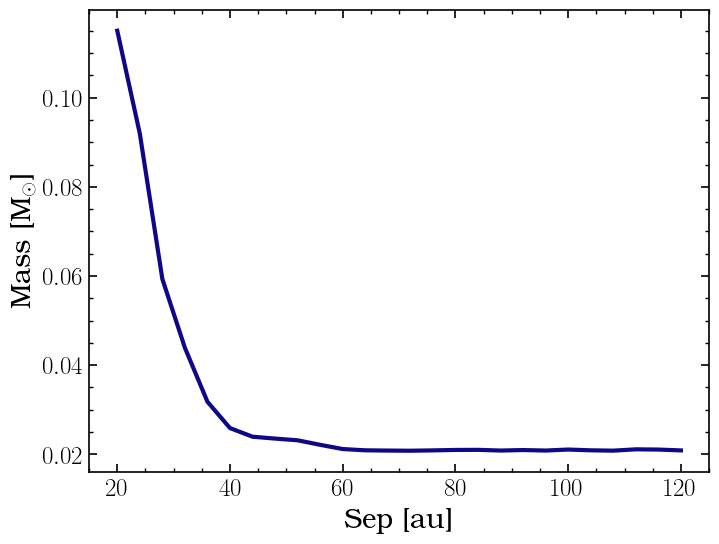

In [1]:
import pickle
import matplotlib.pyplot as plt
masslimit = pickle.load(open('contrast-curve-ex.pkl','rb'))
sepau = np.linspace(20,120,len(masslimit))
plt.plot(sepau,masslimit)
plt.ylabel('Mass [M$_\odot$]')
plt.xlabel('Sep [au]')

To make a completeness map, we need to generate an array of simulated planets in bins of (mass,semi-major axis) space.  I'm going to pick a 100x100 sample grid:

In [2]:
Npoints = 100
# A log uniform grid of masses:
massArray = np.logspace(-3,0.01,Npoints)
# a log uniform grid of semi-major axes:
smaArray = np.logspace(0,3,Npoints)
# make a meshgrid:
sma,mass = np.meshgrid(smaArray, massArray)
# Also the host star's mass:
Mstar = 1.0

Let's use projecc to generate random orbital parameters for each simulated orbit and project it onto the plane of the sky to get the projected separation:

In [5]:
# Get number of orbits:
N = sma.flatten().shape[0]
# Generate random orbital elements for each orbit. We don't need the random sma generated by this function,
# because we're using the sma's from the above grid. We also don't care about the longitude of nodes since we're working
# with one-dimensional separation.
sma_throwaway, ecc, inc, argp, lon, meananom = DrawOrbits(N, EccNielsenPrior = True, DrawLON = False, DrawSMA = False)

# compute projected separation for each smulated orbit:
kep = KeplersConstant(Mstar*u.Msun,mass.flatten()*u.Msun)
pos, vel, acc = KeplerianToCartesian(sma.flatten()*u.AU,ecc,inc,argp,lon,meananom,kep)
r = np.sqrt(pos[:,0]**2 + pos[:,1]**2).value

# reshape onto grid:
projSep = np.reshape(r,sma.shape)

Now for each orbit in each bin of (mass,sma), would we have detected the planet given our contrast curve?

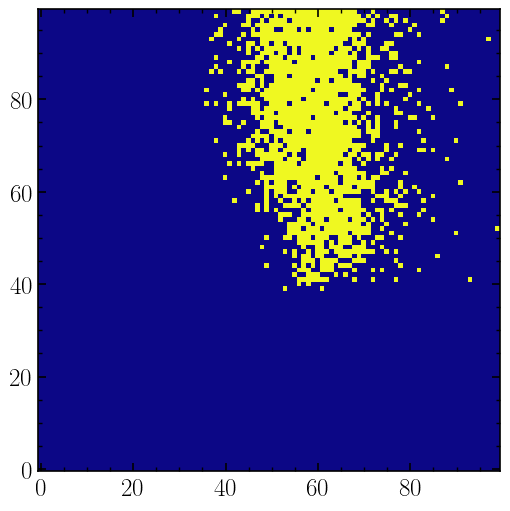

In [6]:
# Make contrast curve into lookup spline:
from scipy.interpolate import UnivariateSpline
    
MassLimitsSpline = UnivariateSpline(sepau,masslimit)

# Make a mask:
mask = np.zeros(sma.shape)

# Set the mask to 1 for all grid points within detection separation region:
ind = np.where((projSep <= np.max(sepau)) & 
            (projSep >= np.min(sepau)))
mask[ind] = 1

# for each point in the detection region, look up the corresponding mass limit.
# If the mass is below the limit, set the mask value to zero (undetected):""
for p,m in zip(ind[0],ind[1]):
    if mass[p,m] < MassLimitsSpline(projSep[p,m]):
        mask[p,m] = 0

%matplotlib inline
plt.imshow(mask)

Each yellow pixel marks a planet that we would have detected at $>$ 5 $\sigma$ confidence out of all the possible combinations of orbits and masses.  To determine completeness fraction, we need to repeat this simulation many times and see how mow often the planet in each bin is detected.

In [7]:
def MakeMap(Npoints, Mstar = 1.0):
    massArray = np.logspace(-3,0.01,Npoints)
    smaArray = np.logspace(0,3,Npoints)
    sma,mass = np.meshgrid(smaArray, massArray)
    N = sma.flatten().shape[0]
    sma_throwaway, ecc, inc, argp, lon, meananom = DrawOrbits(N, EccNielsenPrior = True, DrawLON = False, DrawSMA = False)
    kep = KeplersConstant(Mstar*u.Msun,mass.flatten()*u.Msun)
    pos, vel, acc = KeplerianToCartesian(sma.flatten()*u.AU,ecc,inc,argp,lon,meananom,kep)
    r = np.sqrt(pos[:,0]**2 + pos[:,1]**2).value
    projSep = np.reshape(r,sma.shape)
    from scipy.interpolate import UnivariateSpline
        
    MassLimitsSpline = UnivariateSpline(sepau,masslimit)
    mask = np.zeros(sma.shape)
    ind = np.where((projSep <= np.max(sepau)) & 
                (projSep >= np.min(sepau)))
    mask[ind] = 1
    for p,m in zip(ind[0],ind[1]):
        if mass[p,m] < MassLimitsSpline(projSep[p,m]):
            mask[p,m] = 0
    return mask

# Repeat simulation many times and store in a cube:
Npoints = 100
Ntrials = 80
FinalMapCube = np.zeros((Ntrials,Npoints,Npoints))
for i in range(Ntrials):
    map = MakeMap(Npoints)
    FinalMapCube[i] = map


Now sum the cube along the 0 axis. Normalizing by the number of trials gives the fraction of simulated planets in each bin that would have been detected in our imaging.

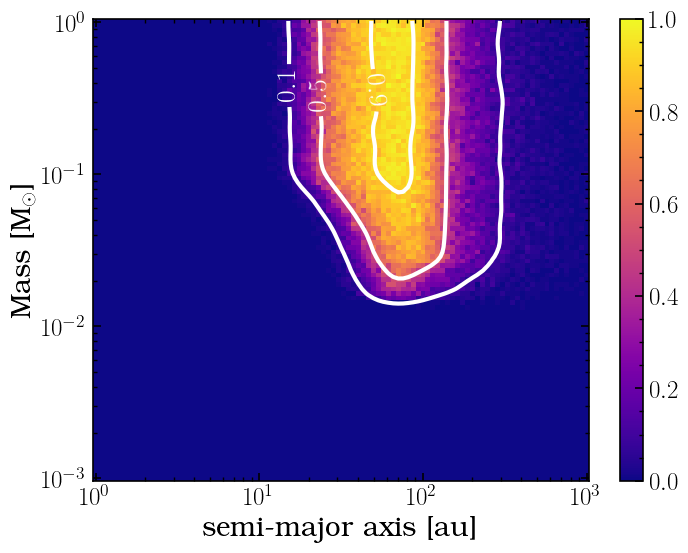

In [8]:
FinalMap = np.sum(FinalMapCube,axis=0)


from scipy.ndimage import gaussian_filter
%matplotlib inline
fig,ax = plt.subplots()
imax = ax.pcolormesh(smaArray,massArray,FinalMap/Ntrials,cmap='plasma')
ax.set_yscale('log')
ax.set_xscale('log')
contours = ax.contour(smaArray,massArray,gaussian_filter(FinalMap/Ntrials, 2), 
                      levels=[0.1,0.5,0.9], colors=['w','w','w'])
ax.clabel(contours, inline=True, fontsize=20)

ax.set_ylabel('Mass [M$_\odot$]')
ax.set_xlabel('semi-major axis [au]')
plt.colorbar(imax)